# Capstone Project - The Battle of Neighborhoods (Week 1)

# Business Problem 


To check the common food cuisines between Toronto, Canada and New York City, USA.

We will explore the NY and Toronto dataset to see 
1.	How does the types of cuisines in Toronto and New York vary? 
2.	Which Cuisines are popular in Toronto and New York? 

Trying to find answers to above mentioned question in the Jupyter notebook. 

Target audience will be one who has recently shifted in this city
OR 
Existing localite who can get benefit to explore mre cusines in neighbourhood


# Data Description


<b>New York Location Dataset</b> will be collected from web (NYU Spatial Data Repository) which is available in Json format. In Python it will be converted to CSV format.
Data will include below columns:
             1.	Borough
             2.	Neighborhood
             3.	Latitude
             4.	Longitude
<b>Toronto Location Dataset</b>
Like NY location dataset Toronto dataset will be build with same columns. Dataset will be same as used in previous project for clustering and segmentation. 
Data will include below columns:
             1.	Postal Code
             2.	Borough
             3.	Neighborhood
             4.	Latitude
             5.	Longitude


# Data Processing - Import Toronto and NY data

First let's import all the necessary packages.
json package is used to handle the json format files.
pandas package is used to handle tabular data and for data analysis.

In [1]:
import pandas as pd
import numpy as np
import json

<b>Import Toranto Data set</b>

In [2]:
TorontoPostalCodes = pd.read_excel("TorantoData_SET.xlsx")
TorontoPostalCodes.shape

(282, 3)

<B>Data Cleaning </B>

In [3]:
df_filtered = TorontoPostalCodes[TorontoPostalCodes['Borough'] != 'Not assigned'] 
TorontoPostalCodes=df_filtered
TorontoPostalCodes.shape

(207, 3)

In [4]:
TorontoPostalCodes = TorontoPostalCodes.groupby(['Postcode', 'Borough'])['Neighbourhood'].apply(list).apply(lambda x:', '.join(x)).to_frame().reset_index()
TorontoPostalCodes.tail()

,Postcode,Borough,Neighbourhood
95,M9N,York,Weston
96,M9P,Etobicoke,Westmount
97,M9R,Etobicoke,"Kingsview Village, Martin Grove Gardens, Richv..."
98,M9V,Etobicoke,"Albion Gardens, Beaumond Heights, Humbergate, ..."
99,M9W,Etobicoke,Northwest


In [5]:
TorontoPostalCodes.loc[TorontoPostalCodes.Neighbourhood == 'Not assigned', ['Neighbourhood']] = TorontoPostalCodes.Borough
TorontoPostalCodes[TorontoPostalCodes.Neighbourhood == 'Not assigned']

,Postcode,Borough,Neighbourhood


In [6]:
TorontoPostalCodes.shape

(100, 3)

In [7]:
#TorontoPostalCodes.describe

<b>Merge the Toronto data set with the latitude and longitude using below code. </b>

In [19]:
url='http://cocl.us/Geospatial_data'
df_pcodes=pd.read_csv(url)
#df_pcodes.head()

ParserError: Error tokenizing data. C error: Expected 1 fields in line 48, saw 3


In [20]:
#in Current data set Postal code is without space so to merge two frames cols are renamed
df_pcodes.columns = ['Postcode', 'Latitude', 'Longitude']
#df_pcodes.head()

NameError: name 'df_pcodes' is not defined

In [ ]:
neighborhoods=pd.merge(TorontoPostalCodes,df_pcodes, how='right', on = 'Postcode')
#neighborhoods.tail(5)

<b> Replace null data found for three Postcode with correct Borough & Neighbourhood </b>

In [ ]:
# Replaced value of Post code which was empty...
neighborhoods.loc[(neighborhoods.Postcode == 'M3A'),'Borough']='North York'
neighborhoods.loc[(neighborhoods.Postcode == 'M4A'),'Borough']='North York'
neighborhoods.loc[(neighborhoods.Postcode == 'M5A'),'Borough']='Downtown Toronto'
neighborhoods.loc[(neighborhoods.Postcode == 'M3A'),'Neighbourhood']='Parkwoods'
neighborhoods.loc[(neighborhoods.Postcode == 'M4A'),'Neighbourhood']='Victoria Village'
neighborhoods.loc[(neighborhoods.Postcode == 'M5A'),'Neighbourhood']='Harbourfront'


In [ ]:
neighborhoods.head()

In [ ]:
#Save the TORONTO dataset in CSV
#neighborhoods.to_csv('Toronto Dataset.csv', index = False)

<b> START Get the NY JSON Data FROM JSON FILE AND SAVE IN CSV FORMAT</b>

In [29]:
# Improt JSON file and 

with open("nyu-2451-34572-geojson.json") as json_data:
    JSONdata = json.load(json_data)
JSONdata

{'type': 'FeatureCollection',
 'totalFeatures': 306,
 'features': [{'type': 'Feature',
   'id': 'nyu_2451_34572.1',
   'geometry': {'type': 'Point',
    'coordinates': [-73.84720052054902, 40.89470517661]},
   'geometry_name': 'geom',
   'properties': {'name': 'Wakefield',
    'stacked': 1,
    'annoline1': 'Wakefield',
    'annoline2': None,
    'annoline3': None,
    'annoangle': 0.0,
    'borough': 'Bronx',
    'bbox': [-73.84720052054902,
     40.89470517661,
     -73.84720052054902,
     40.89470517661]}},
  {'type': 'Feature',
   'id': 'nyu_2451_34572.2',
   'geometry': {'type': 'Point',
    'coordinates': [-73.82993910812398, 40.87429419303012]},
   'geometry_name': 'geom',
   'properties': {'name': 'Co-op City',
    'stacked': 2,
    'annoline1': 'Co-op',
    'annoline2': 'City',
    'annoline3': None,
    'annoangle': 0.0,
    'borough': 'Bronx',
    'bbox': [-73.82993910812398,
     40.87429419303012,
     -73.82993910812398,
     40.87429419303012]}},
  {'type': 'Feature',
 

Now let's convert the json file from above code to  dataframe.

In [30]:
# Creating a dataframe with required columns name same will be used to extract 
#respective data from JSON file for listed columns
DF_column_names = ['Borough', 'Neighborhood', 'Latitude', 'Longitude']
NewDF = pd.DataFrame(columns = DF_column_names)
NewDF

,Borough,Neighborhood,Latitude,Longitude


As seen in jsondata output our new dataframe columns are available in   ('type': 'Feature',)
Example
{'type': 'FeatureCollection',
 'totalFeatures': 306,
 'features': [{'type': 'Feature',
   'id': 'nyu_2451_34572.1',
   'geometry': <b>{'type': 'Point',
    'coordinates': [-73.84720052054902, 40.89470517661]}</b>,
   'geometry_name': 'geom',
   <b>'properties'</b>: {<b>'name':</b> 'Wakefield',

    'borough': 'Bronx',
we will loop thru all features later will retrieve properties 'borough' 'name' 
Geometry - coordinates

In [32]:
for dat in JSONdata['features']:
    borough = dat['properties']['borough']
    neighborhood = dat['properties']['name']
    latitude = dat['geometry']['coordinates'][1]
    longitude = dat['geometry']['coordinates'][0]
    
    NewDF = NewDF.append({
        'Borough': borough, 
        'Neighborhood': neighborhood, 
        'Latitude': latitude, 
        'Longitude': longitude
    }, ignore_index = True)

In [33]:
NewDF.shape
#NewDF.describe()

(612, 4)

In [34]:
NewDF.head()

,Borough,Neighborhood,Latitude,Longitude
0,Bronx,Wakefield,40.894705,-73.847201
1,Bronx,Co-op City,40.874294,-73.829939
2,Bronx,Eastchester,40.887556,-73.827806
3,Bronx,Fieldston,40.895437,-73.905643
4,Bronx,Riverdale,40.890834,-73.912585


In [27]:
# export the dataframe content in NY data set 
#NewDF.to_csv('New York Dataset.csv', index = False)

# PART 2 - Methodology Relation Between Food Cuisines

Here after we will start the Data Analysis for  Toronto and NY.
Approach load data


In [8]:
# Packages for Visualization
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt
import seaborn as sns # Package for generating beautiful visualizations
import folium # Package for generating interactive maps

# Packages for getting geospatial coordinates
from geopy.geocoders import Nominatim
import geocoder
import requests

from sklearn.cluster import KMeans

%matplotlib inline

In [9]:
# We will load the Toronto.csv exported in CSV file above....

Toronto_dataSet = pd.read_csv('Toronto Dataset.csv')
Toronto_dataSet.tail()

,Postcode,Borough,Neighbourhood,Latitude,Longitude
98,M9V,Etobicoke,"Albion Gardens, Beaumond Heights, Humbergate, ...",43.739416,-79.588437
99,M9W,Etobicoke,Northwest,43.706748,-79.594054
100,M3A,North York,Parkwoods,43.753259,-79.329656
101,M4A,North York,Victoria Village,43.725882,-79.315572
102,M5A,Downtown Toronto,Harbourfront,43.654260,-79.360636


In [10]:
# Visualise this data using folium map code requires latitude and longitude of Toronto... #(40.7410861, -73.9896297241625)
#The coordinates of Toronto: 43.653963, -79.387207
from geopy.geocoders import Nominatim

geolocator=Nominatim(timeout=15)
location = geolocator.geocode("Toronto")
print((location.latitude, location.longitude))

toronto_latitude =location.latitude 
toronto_longitude =location.longitude

/Users/pujarohatgi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: Using Nominatim with the default "geopy/1.20.0" `user_agent` is strongly discouraged, as it violates Nominatim's ToS https://operations.osmfoundation.org/policies/nominatim/ and may possibly cause 403 and 429 HTTP errors. Please specify a custom `user_agent` with `Nominatim(user_agent="my-application")` or by overriding the default `user_agent`: `geopy.geocoders.options.default_user_agent = "my-application"`. In geopy 2.0 this will become an exception.
  """


(43.653963, -79.387207)


Using folium generate a map for better understanding of the distribution. zoom_start attribute is pretty much user preference, it need not be a fixed value. But 10 seems perfect for this map.
In order to create the popup labels, iterate through the Latitude, Longitude, Borough, Neighborhood and use the Popup method of folium to generate the label. Then using the CircleMarker method, plot the points on the map. Click on the circle marker to get the location name.

In [11]:
torontoMAP = folium.Map(location = [toronto_latitude, toronto_longitude], zoom_start = 10)

for lat, lng, borough, neighborhood in zip(Toronto_dataSet['Latitude'], Toronto_dataSet['Longitude'], Toronto_dataSet['Borough'], Toronto_dataSet['Neighbourhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html = True)
    folium.CircleMarker(
    [lat, lng], 
    radius = 5, 
    popup = label, 
    color = 'blue', 
    fill = True, 
    fill_color = '#3186cc', 
    fill_opacity = 0.7).add_to(torontoMAP)
torontoMAP

In [12]:
# Check the neighbourhood by group Borough
Toronto_dataSet.groupby('Borough').count()

,Postcode,Neighbourhood,Latitude,Longitude
Borough,,,,
Central Toronto,9,9,9,9
Downtown Toronto,18,18,18,18
East Toronto,5,5,5,5
East York,5,5,5,5
Etobicoke,12,12,12,12
Mississauga,1,1,1,1
North York,24,24,24,24
Queen's Park,1,1,1,1
Scarborough,17,17,17,17


Lets consider "North York" to find the cusine..

In [13]:
northYork_df = Toronto_dataSet[Toronto_dataSet['Borough'] == 'Downtown Toronto'].reset_index(drop = True)
#northYork_df.head(24)   #North York

Like above we will get the cooriantes of North york anduse Folium to build visualisation

In [14]:
from geopy.geocoders import Nominatim
#North York
geolocator = Nominatim(timeout=10)
location = geolocator.geocode("Downtown Toronto")
print((location.latitude, location.longitude))

NYork_latitude =location.latitude 
NYork_longitude =location.longitude

/Users/pujarohatgi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DeprecationWarning: Using Nominatim with the default "geopy/1.20.0" `user_agent` is strongly discouraged, as it violates Nominatim's ToS https://operations.osmfoundation.org/policies/nominatim/ and may possibly cause 403 and 429 HTTP errors. Please specify a custom `user_agent` with `Nominatim(user_agent="my-application")` or by overriding the default `user_agent`: `geopy.geocoders.options.default_user_agent = "my-application"`. In geopy 2.0 this will become an exception.
  This is separate from the ipykernel package so we can avoid doing imports until


(43.6563221, -79.3809161)


In [15]:
NYorkMAP = folium.Map(location = [toronto_latitude, toronto_longitude], zoom_start = 10)

for lat, lng, borough, neighborhood in zip(northYork_df['Latitude'], northYork_df['Longitude'], northYork_df['Borough'], northYork_df['Neighbourhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html = True)
    folium.CircleMarker(
    [lat, lng], 
    radius = 5, 
    popup = label, 
    color = 'blue', 
    fill = True, 
    fill_color = '#3186cc', 
    fill_opacity = 0.7).add_to(NYorkMAP)
NYorkMAP

Use the Foursquare API to get the loction data for the particular neighborhood. The credentials are necessary to get the data. Change the credentials when using

In [16]:
LIMIT = 150
radius = 500
CLIENT_ID = 'YEH5XWW0MTFQHYX2DN15QN40NB3AUASXXQMJT0DYS1SPNDEP' 
CLIENT_SECRET = '1D4GDE33PN4NDNGCRHG4R2HSILOEOH2W1PRVAXYXZWRTXEW1' 
VERSION = '20181204'
print("My Credentials: ")
print("CLIENT_ID: " + CLIENT_ID)
print("CLIENT_SECRET: " + CLIENT_SECRET)

My Credentials: 
CLIENT_ID: YEH5XWW0MTFQHYX2DN15QN40NB3AUASXXQMJT0DYS1SPNDEP
CLIENT_SECRET: 1D4GDE33PN4NDNGCRHG4R2HSILOEOH2W1PRVAXYXZWRTXEW1


The below helper function returns nearby venues for all the neighborhoods. It simply iterates for every neighborhood and generates the url from which the data is extracted and modified for our use.

In [17]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    '''
    This  function returns the nearby venues
    '''
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues_down = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues_down.columns = ['Neighbourhood', 
                  'Neighbourhood Latitude', 
                  'Neighbourhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues_down)

In [18]:
down_venues = getNearbyVenues(names=northYork_df['Neighbourhood'],
                                   latitudes=northYork_df['Latitude'],
                                   longitudes=northYork_df['Longitude']
                                  )

Rosedale
Cabbagetown, St. James Town
Church and Wellesley
Ryerson, Garden District
St. James Town
Berczy Park
Central Bay Street
Adelaide, King, Richmond
Harbourfront East, Toronto Islands, Union Station
Design Exchange, Toronto Dominion Centre
Commerce Court, Victoria Hotel
Harbord, University of Toronto
Chinatown, Grange Park, Kensington Market
CN Tower, Bathurst Quay, Island airport, Harbourfront West, King and Spadina, Railway Lands, South Niagara
Stn A PO Boxes 25 The Esplanade
First Canadian Place, Underground city
Christie
Harbourfront


In [19]:
print(down_venues.shape)
down_venues.head(2)

(1279, 7)


,Neighbourhood,Neighbourhood Latitude,Neighbourhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Rosedale,43.679563,-79.377529,Rosedale Park,43.682328,-79.378934,Playground
1,Rosedale,43.679563,-79.377529,Whitney Park,43.682036,-79.373788,Park


In [20]:
#Onehot Encode the categories
down_onehot = pd.get_dummies(down_venues[['Venue Category']], prefix = '', prefix_sep = "")

down_onehot['Neighbourhood'] = down_venues['Neighbourhood']

fixed_columns = [down_onehot.columns[-1]] + list(down_onehot.columns[:-1])
down_onehot = down_onehot[fixed_columns]

down_onehot.head()

,Neighbourhood,Afghan Restaurant,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,...,Thrift / Vintage Store,Toy / Game Store,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Wine Bar,Wings Joint,Yoga Studio
0,Rosedale,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Rosedale,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Rosedale,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Rosedale,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,"Cabbagetown, St. James Town",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### Next, let's group rows by neighborhood and by taking the mean of the frequency of occurrence of each category

In [22]:
down_grouped = down_onehot.groupby('Neighbourhood').mean().reset_index()
down_grouped.head()

,Neighbourhood,Afghan Restaurant,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,...,Thrift / Vintage Store,Toy / Game Store,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Wine Bar,Wings Joint,Yoga Studio
0,"Adelaide, King, Richmond",0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.020000,0.0,...,0.0,0.0,0.0,0.0,0.020000,0.0,0.0,0.010000,0.0,0.000000
1,Berczy Park,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.018182,0.0,0.0,0.000000,0.0,0.000000
2,"CN Tower, Bathurst Quay, Island airport, Harbo...",0.0,0.066667,0.066667,0.066667,0.133333,0.133333,0.133333,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000
3,"Cabbagetown, St. James Town",0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000
4,Central Bay Street,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.011905,0.0,...,0.0,0.0,0.0,0.0,0.011905,0.0,0.0,0.011905,0.0,0.011905


In [23]:
down_grouped_neighbor = down_grouped['Neighbourhood'] # Store the neighborhood column in a variable

In [24]:
#Store all the column names that end with Restaurant as we are interested in this.
down_grouped = down_grouped.loc[:, down_grouped.columns.str.endswith('Restaurant')]
down_grouped.head()

,Afghan Restaurant,American Restaurant,Asian Restaurant,Belgian Restaurant,Brazilian Restaurant,Caribbean Restaurant,Chinese Restaurant,Colombian Restaurant,Comfort Food Restaurant,Dim Sum Restaurant,...,Portuguese Restaurant,Ramen Restaurant,Restaurant,Seafood Restaurant,Sushi Restaurant,Taiwanese Restaurant,Thai Restaurant,Theme Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant
0,0.0,0.020000,0.03,0.0,0.01,0.000000,0.000000,0.01,0.000000,0.0,...,0.000000,0.010000,0.030000,0.010000,0.030000,0.000000,0.040000,0.0,0.020000,0.0
1,0.0,0.000000,0.00,0.0,0.00,0.000000,0.000000,0.00,0.018182,0.0,...,0.000000,0.000000,0.018182,0.036364,0.000000,0.000000,0.018182,0.0,0.018182,0.0
2,0.0,0.000000,0.00,0.0,0.00,0.000000,0.000000,0.00,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0
3,0.0,0.000000,0.00,0.0,0.00,0.023256,0.023256,0.00,0.000000,0.0,...,0.000000,0.000000,0.069767,0.000000,0.000000,0.023256,0.023256,0.0,0.000000,0.0
4,0.0,0.011905,0.00,0.0,0.00,0.000000,0.023810,0.00,0.000000,0.0,...,0.011905,0.011905,0.011905,0.011905,0.011905,0.000000,0.011905,0.0,0.011905,0.0


In [27]:
# Add the neighborhood column
down_grouped['Neighbourhood'] = down_grouped_neighbor
down_grouped.head()

,Afghan Restaurant,American Restaurant,Asian Restaurant,Belgian Restaurant,Brazilian Restaurant,Caribbean Restaurant,Chinese Restaurant,Colombian Restaurant,Comfort Food Restaurant,Dim Sum Restaurant,...,Ramen Restaurant,Restaurant,Seafood Restaurant,Sushi Restaurant,Taiwanese Restaurant,Thai Restaurant,Theme Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Neighbourhood
0,0.0,0.020000,0.03,0.0,0.01,0.000000,0.000000,0.01,0.000000,0.0,...,0.010000,0.030000,0.010000,0.030000,0.000000,0.040000,0.0,0.020000,0.0,"Adelaide, King, Richmond"
1,0.0,0.000000,0.00,0.0,0.00,0.000000,0.000000,0.00,0.018182,0.0,...,0.000000,0.018182,0.036364,0.000000,0.000000,0.018182,0.0,0.018182,0.0,Berczy Park
2,0.0,0.000000,0.00,0.0,0.00,0.000000,0.000000,0.00,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,"CN Tower, Bathurst Quay, Island airport, Harbo..."
3,0.0,0.000000,0.00,0.0,0.00,0.023256,0.023256,0.00,0.000000,0.0,...,0.000000,0.069767,0.000000,0.000000,0.023256,0.023256,0.0,0.000000,0.0,"Cabbagetown, St. James Town"
4,0.0,0.011905,0.00,0.0,0.00,0.000000,0.023810,0.00,0.000000,0.0,...,0.011905,0.011905,0.011905,0.011905,0.000000,0.011905,0.0,0.011905,0.0,Central Bay Street


In [28]:
# Rearrange the neighborhood column to first
cols = list(down_grouped)
cols.insert(0, cols.pop(cols.index('Neighbourhood')))
down_grouped = down_grouped.loc[:, cols]
down_grouped.head()

,Neighbourhood,Afghan Restaurant,American Restaurant,Asian Restaurant,Belgian Restaurant,Brazilian Restaurant,Caribbean Restaurant,Chinese Restaurant,Colombian Restaurant,Comfort Food Restaurant,...,Portuguese Restaurant,Ramen Restaurant,Restaurant,Seafood Restaurant,Sushi Restaurant,Taiwanese Restaurant,Thai Restaurant,Theme Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant
0,"Adelaide, King, Richmond",0.0,0.020000,0.03,0.0,0.01,0.000000,0.000000,0.01,0.000000,...,0.000000,0.010000,0.030000,0.010000,0.030000,0.000000,0.040000,0.0,0.020000,0.0
1,Berczy Park,0.0,0.000000,0.00,0.0,0.00,0.000000,0.000000,0.00,0.018182,...,0.000000,0.000000,0.018182,0.036364,0.000000,0.000000,0.018182,0.0,0.018182,0.0
2,"CN Tower, Bathurst Quay, Island airport, Harbo...",0.0,0.000000,0.00,0.0,0.00,0.000000,0.000000,0.00,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0
3,"Cabbagetown, St. James Town",0.0,0.000000,0.00,0.0,0.00,0.023256,0.023256,0.00,0.000000,...,0.000000,0.000000,0.069767,0.000000,0.000000,0.023256,0.023256,0.0,0.000000,0.0
4,Central Bay Street,0.0,0.011905,0.00,0.0,0.00,0.000000,0.023810,0.00,0.000000,...,0.011905,0.011905,0.011905,0.011905,0.011905,0.000000,0.011905,0.0,0.011905,0.0




Print out the top 5 restaurants in the neighborhoods.


In [29]:
num_top_venues = 5

for hood in down_grouped['Neighbourhood']:
    print('------- ' + hood + ' -------')
    temp = down_grouped[down_grouped['Neighbourhood'] == hood].T.reset_index()
    temp.columns = ['Venue', 'Frequency']
    temp = temp.iloc[1:]
    temp['Frequency'] = temp['Frequency'].astype(float)
    temp = temp.round({'Frequency': 2})
    print(temp.sort_values('Frequency', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

------- Adelaide, King, Richmond -------
                           Venue  Frequency
0                Thai Restaurant       0.04
1               Asian Restaurant       0.03
2               Sushi Restaurant       0.03
3                     Restaurant       0.03
4  Vegetarian / Vegan Restaurant       0.02


------- Berczy Park -------
                           Venue  Frequency
0             Seafood Restaurant       0.04
1            Japanese Restaurant       0.02
2  Vegetarian / Vegan Restaurant       0.02
3             Italian Restaurant       0.02
4                Thai Restaurant       0.02


------- CN Tower, Bathurst Quay, Island airport, Harbourfront West, King and Spadina, Railway Lands, South Niagara -------
                       Venue  Frequency
0          Afghan Restaurant        0.0
1         Persian Restaurant        0.0
2          Korean Restaurant        0.0
3  Latin American Restaurant        0.0
4   Mediterranean Restaurant        0.0


------- Cabbagetown, St. James Tow

In [31]:
def return_most_common_venues(row, num_top_venues):
    """
    Returns most common venues
    """
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [32]:
#Create a new dataframe based on the top venues

num_top_restaurants = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top restaurants
columns = ['Neighbourhood']
for ind in np.arange(num_top_restaurants):
    try:
        columns.append('{}{} Most Common Restaurant'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Restaurant'.format(ind+1))

# create a new dataframe
down_restaurants_sorted = pd.DataFrame(columns=columns)
down_restaurants_sorted['Neighbourhood'] = down_grouped['Neighbourhood']

for ind in np.arange(down_grouped.shape[0]):
    down_restaurants_sorted.iloc[ind, 1:] = return_most_common_venues(down_grouped.iloc[ind, :], num_top_restaurants)

down_restaurants_sorted

,Neighbourhood,1st Most Common Restaurant,2nd Most Common Restaurant,3rd Most Common Restaurant,4th Most Common Restaurant,5th Most Common Restaurant,6th Most Common Restaurant,7th Most Common Restaurant,8th Most Common Restaurant,9th Most Common Restaurant,10th Most Common Restaurant
0,"Adelaide, King, Richmond",Thai Restaurant,Asian Restaurant,Sushi Restaurant,Restaurant,Vegetarian / Vegan Restaurant,American Restaurant,Modern European Restaurant,Italian Restaurant,Japanese Restaurant,Latin American Restaurant
1,Berczy Park,Seafood Restaurant,Comfort Food Restaurant,Restaurant,Greek Restaurant,Vegetarian / Vegan Restaurant,Italian Restaurant,Japanese Restaurant,French Restaurant,Thai Restaurant,Brazilian Restaurant
2,"CN Tower, Bathurst Quay, Island airport, Harbo...",Vietnamese Restaurant,Doner Restaurant,Gluten-free Restaurant,German Restaurant,French Restaurant,Filipino Restaurant,Fast Food Restaurant,Falafel Restaurant,Ethiopian Restaurant,Dumpling Restaurant
3,"Cabbagetown, St. James Town",Restaurant,Italian Restaurant,Indian Restaurant,Thai Restaurant,Taiwanese Restaurant,Japanese Restaurant,Caribbean Restaurant,Chinese Restaurant,Dumpling Restaurant,French Restaurant
4,Central Bay Street,Italian Restaurant,Japanese Restaurant,Chinese Restaurant,Indian Restaurant,Modern European Restaurant,French Restaurant,Vegetarian / Vegan Restaurant,Korean Restaurant,Mediterranean Restaurant,Falafel Restaurant
5,"Chinatown, Grange Park, Kensington Market",Vietnamese Restaurant,Dumpling Restaurant,Chinese Restaurant,Mexican Restaurant,Vegetarian / Vegan Restaurant,Caribbean Restaurant,Comfort Food Restaurant,Hotpot Restaurant,Filipino Restaurant,Japanese Restaurant
6,Christie,Italian Restaurant,Restaurant,Vietnamese Restaurant,Doner Restaurant,German Restaurant,French Restaurant,Filipino Restaurant,Fast Food Restaurant,Falafel Restaurant,Ethiopian Restaurant
7,Church and Wellesley,Sushi Restaurant,Japanese Restaurant,Restaurant,Mediterranean Restaurant,Vietnamese Restaurant,Mexican Restaurant,American Restaurant,Caribbean Restaurant,Ethiopian Restaurant,Fast Food Restaurant
8,"Commerce Court, Victoria Hotel",Restaurant,American Restaurant,Seafood Restaurant,Italian Restaurant,Thai Restaurant,Vegetarian / Vegan Restaurant,Japanese Restaurant,Latin American Restaurant,Asian Restaurant,Gluten-free Restaurant
9,"Design Exchange, Toronto Dominion Centre",Restaurant,American Restaurant,Seafood Restaurant,Italian Restaurant,Japanese Restaurant,Thai Restaurant,Asian Restaurant,Greek Restaurant,Fast Food Restaurant,Vegetarian / Vegan Restaurant




Using the KMeans method cluster the neighborhood


In [33]:
kclusters = 5
down_grouped_clustering = down_grouped.drop('Neighbourhood', 1)
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(down_grouped_clustering)
# check cluster labels generated for each row in the dataframe
kmeans.labels_

array([3, 1, 0, 1, 1, 4, 1, 2, 3, 3, 3, 1, 0, 1, 0, 1, 3, 1], dtype=int32)

In [34]:
down_merged = northYork_df
down_merged['Cluster Labels'] = kmeans.labels_
down_merged = down_merged.join(down_restaurants_sorted.set_index('Neighbourhood'), on='Neighbourhood')
down_merged.head()

,Postcode,Borough,Neighbourhood,Latitude,Longitude,Cluster Labels,1st Most Common Restaurant,2nd Most Common Restaurant,3rd Most Common Restaurant,4th Most Common Restaurant,5th Most Common Restaurant,6th Most Common Restaurant,7th Most Common Restaurant,8th Most Common Restaurant,9th Most Common Restaurant,10th Most Common Restaurant
0,M4W,Downtown Toronto,Rosedale,43.679563,-79.377529,3,Vietnamese Restaurant,Doner Restaurant,Gluten-free Restaurant,German Restaurant,French Restaurant,Filipino Restaurant,Fast Food Restaurant,Falafel Restaurant,Ethiopian Restaurant,Dumpling Restaurant
1,M4X,Downtown Toronto,"Cabbagetown, St. James Town",43.667967,-79.367675,1,Restaurant,Italian Restaurant,Indian Restaurant,Thai Restaurant,Taiwanese Restaurant,Japanese Restaurant,Caribbean Restaurant,Chinese Restaurant,Dumpling Restaurant,French Restaurant
2,M4Y,Downtown Toronto,Church and Wellesley,43.665860,-79.383160,0,Sushi Restaurant,Japanese Restaurant,Restaurant,Mediterranean Restaurant,Vietnamese Restaurant,Mexican Restaurant,American Restaurant,Caribbean Restaurant,Ethiopian Restaurant,Fast Food Restaurant
3,M5B,Downtown Toronto,"Ryerson, Garden District",43.657162,-79.378937,1,Fast Food Restaurant,Middle Eastern Restaurant,Italian Restaurant,Restaurant,Ramen Restaurant,Chinese Restaurant,Ethiopian Restaurant,Vegetarian / Vegan Restaurant,Japanese Restaurant,Mexican Restaurant
4,M5C,Downtown Toronto,St. James Town,43.651494,-79.375418,1,Restaurant,American Restaurant,Italian Restaurant,Seafood Restaurant,Japanese Restaurant,Comfort Food Restaurant,New American Restaurant,German Restaurant,Vegetarian / Vegan Restaurant,Latin American Restaurant


In [35]:
down_merged = northYork_df
down_merged.shape
#down_merged['Cluster Labels'] = kmeans.labels_
#down_merged['Cluster Labels'] = kmeans.labels_
kmeans.labels_.shape

(18,)

In [36]:
#Display the Clusters on the map

map_clusters_down = folium.Map(location = [NYork_latitude, NYork_longitude], zoom_start = 13)

#NYork_latitude = Latitude and Longtitude of Downtown Toronto
x = np.arange(kclusters)
ys = [i+x+(i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

markers_colors = []
for lat, lon, poi, cluster in zip(down_merged['Latitude'], down_merged['Longitude'], down_merged['Neighbourhood'], down_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters_down)
    
map_clusters_down

# Similarly anlayse New York Dataset


In [37]:
# We will load the NY.csv exported in CSV file above....
NY_dataSet = pd.read_csv('New York Dataset.csv')
NY_dataSet.tail()

,Borough,Neighborhood,Latitude,Longitude
301,Manhattan,Hudson Yards,40.756658,-74.000111
302,Queens,Hammels,40.587338,-73.805530
303,Queens,Bayswater,40.611322,-73.765968
304,Queens,Queensbridge,40.756091,-73.945631
305,Staten Island,Fox Hills,40.617311,-74.081740


In [38]:
# Visualise this data using folium map code requires latitude and longitude of Toronto... #(40.7410861, -73.9896297241625)
#The coordinates of NY: (40.7127281, -74.0060152)
from geopy.geocoders import Nominatim
geolocator = Nominatim(timeout=10)
location = geolocator.geocode("New York")
print((location.latitude, location.longitude))
NY_latitude =location.latitude 
NY_longitude =location.longitude

/Users/pujarohatgi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: DeprecationWarning: Using Nominatim with the default "geopy/1.20.0" `user_agent` is strongly discouraged, as it violates Nominatim's ToS https://operations.osmfoundation.org/policies/nominatim/ and may possibly cause 403 and 429 HTTP errors. Please specify a custom `user_agent` with `Nominatim(user_agent="my-application")` or by overriding the default `user_agent`: `geopy.geocoders.options.default_user_agent = "my-application"`. In geopy 2.0 this will become an exception.
  after removing the cwd from sys.path.


(40.7127281, -74.0060152)


In [39]:
NYMAP = folium.Map(location = [NY_latitude, NY_longitude], zoom_start = 10)

for lat, lng, borough, neighborhood in zip(NY_dataSet['Latitude'], NY_dataSet['Longitude'], NY_dataSet['Borough'], NY_dataSet['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html = True)
    folium.CircleMarker(
    [lat, lng], 
    radius = 5, 
    popup = label, 
    color = 'blue', 
    fill = True, 
    fill_color = '#3186cc', 
    fill_opacity = 0.7).add_to(NYMAP)
NYMAP

In [40]:
# Check the neighbourhood by group Borough
NY_dataSet.groupby('Borough').count()

,Neighborhood,Latitude,Longitude
Borough,,,
Bronx,52,52,52
Brooklyn,70,70,70
Manhattan,40,40,40
Queens,81,81,81
Staten Island,63,63,63


In [41]:
NY_df = NY_dataSet[NY_dataSet['Borough'] == 'Queens'].reset_index(drop = True)
NY_df.head(4)   #Queens  instaead of Brooklyn

,Borough,Neighborhood,Latitude,Longitude
0,Queens,Astoria,40.768509,-73.915654
1,Queens,Woodside,40.746349,-73.901842
2,Queens,Jackson Heights,40.751981,-73.882821
3,Queens,Elmhurst,40.744049,-73.881656


In [42]:
#Like above we will get the cooriantes of Queens and use Folium to build visualisation
from geopy.geocoders import Nominatim
#Queens  instaead of Brooklyn
geolocator = Nominatim(timeout=10)
location = geolocator.geocode("Queens")
print((location.latitude, location.longitude))

NewYorkQueens_latitude =location.latitude 
NewYorkQueens_longitude =location.longitude

/Users/pujarohatgi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: DeprecationWarning: Using Nominatim with the default "geopy/1.20.0" `user_agent` is strongly discouraged, as it violates Nominatim's ToS https://operations.osmfoundation.org/policies/nominatim/ and may possibly cause 403 and 429 HTTP errors. Please specify a custom `user_agent` with `Nominatim(user_agent="my-application")` or by overriding the default `user_agent`: `geopy.geocoders.options.default_user_agent = "my-application"`. In geopy 2.0 this will become an exception.
  after removing the cwd from sys.path.


(40.6524927, -73.7914214158161)


In [43]:
# Build MAP for Queens Borough from NEw York City
NewYorkMAP = folium.Map(location = [NewYorkQueens_latitude, NewYorkQueens_longitude], zoom_start = 10)

for lat, lng, borough, neighborhood in zip(NY_df['Latitude'], NY_df['Longitude'], NY_df['Borough'], NY_df['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html = True)
    folium.CircleMarker(
    [lat, lng], 
    radius = 5, 
    popup = label, 
    color = 'blue', 
    fill = True, 
    fill_color = '#3186cc', 
    fill_opacity = 0.7).add_to(NewYorkMAP)
NewYorkMAP

In [44]:
down_venues = getNearbyVenues(names=NY_df['Neighborhood'],
                                   latitudes=NY_df['Latitude'],
                                   longitudes=NY_df['Longitude']
                                  )

Astoria
Woodside
Jackson Heights
Elmhurst
Howard Beach
Corona
Forest Hills
Kew Gardens
Richmond Hill
Flushing
Long Island City
Sunnyside
East Elmhurst
Maspeth
Ridgewood
Glendale
Rego Park
Woodhaven
Ozone Park
South Ozone Park
College Point
Whitestone
Bayside
Auburndale
Little Neck
Douglaston
Glen Oaks
Bellerose
Kew Gardens Hills
Fresh Meadows
Briarwood
Jamaica Center
Oakland Gardens
Queens Village
Hollis
South Jamaica
St. Albans
Rochdale
Springfield Gardens
Cambria Heights
Rosedale
Far Rockaway
Broad Channel
Breezy Point
Steinway
Beechhurst
Bay Terrace
Edgemere
Arverne
Rockaway Beach
Neponsit
Murray Hill
Floral Park
Holliswood
Jamaica Estates
Queensboro Hill
Hillcrest
Ravenswood
Lindenwood
Laurelton
Lefrak City
Belle Harbor
Rockaway Park
Somerville
Brookville
Bellaire
North Corona
Forest Hills Gardens
Jamaica Hills
Utopia
Pomonok
Astoria Heights
Hunters Point
Sunnyside Gardens
Blissville
Roxbury
Middle Village
Malba
Hammels
Bayswater
Queensbridge


In [45]:
print(down_venues.shape)
down_venues.head(2)

(2091, 7)


,Neighbourhood,Neighbourhood Latitude,Neighbourhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Astoria,40.768509,-73.915654,Favela Grill,40.767348,-73.917897,Brazilian Restaurant
1,Astoria,40.768509,-73.915654,Orange Blossom,40.769856,-73.917012,Gourmet Shop


In [46]:
#Onehot Encode the categories
down_onehot = pd.get_dummies(down_venues[['Venue Category']], prefix = '', prefix_sep = "")

down_onehot['Neighbourhood'] = down_venues['Neighbourhood']

fixed_columns = [down_onehot.columns[-1]] + list(down_onehot.columns[:-1])
down_onehot = down_onehot[fixed_columns]
down_onehot.head()

,Neighbourhood,Accessories Store,Afghan Restaurant,Airport Terminal,American Restaurant,Antique Shop,Arepa Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,...,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Warehouse Store,Weight Loss Center,Wine Bar,Wine Shop,Women's Store,Yoga Studio
0,Astoria,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Astoria,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Astoria,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Astoria,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Astoria,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [47]:
down_grouped = down_onehot.groupby('Neighbourhood').mean().reset_index()
down_grouped.head()

,Neighbourhood,Accessories Store,Afghan Restaurant,Airport Terminal,American Restaurant,Antique Shop,Arepa Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,...,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Warehouse Store,Weight Loss Center,Wine Bar,Wine Shop,Women's Store,Yoga Studio
0,Arverne,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.00,0.000000,0.0,0.0,0.0,0.000000,0.0,0.055556,0.000000,0.0
1,Astoria,0.000000,0.0,0.0,0.010000,0.0,0.0,0.0,0.0,0.0,...,0.01,0.000000,0.0,0.0,0.0,0.000000,0.0,0.010000,0.000000,0.0
2,Astoria Heights,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.00,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0
3,Auburndale,0.000000,0.0,0.0,0.052632,0.0,0.0,0.0,0.0,0.0,...,0.00,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0
4,Bay Terrace,0.025641,0.0,0.0,0.051282,0.0,0.0,0.0,0.0,0.0,...,0.00,0.025641,0.0,0.0,0.0,0.025641,0.0,0.000000,0.051282,0.0


In [48]:
down_grouped_neighbor = down_grouped['Neighbourhood'] # Store the neighborhood column in a variable

In [49]:
#Store all the column names that end with Restaurant as we are interested in this.
down_grouped = down_grouped.loc[:, down_grouped.columns.str.endswith('Restaurant')]
down_grouped.head()

,Afghan Restaurant,American Restaurant,Arepa Restaurant,Argentinian Restaurant,Asian Restaurant,Brazilian Restaurant,Cajun / Creole Restaurant,Cantonese Restaurant,Caribbean Restaurant,Chinese Restaurant,...,Spanish Restaurant,Sushi Restaurant,Szechuan Restaurant,Taiwanese Restaurant,Tapas Restaurant,Thai Restaurant,Tibetan Restaurant,Turkish Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant
0,0.0,0.000000,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.00,...,0.0,0.00,0.0,0.0,0.0,0.055556,0.0,0.0,0.00,0.0
1,0.0,0.010000,0.0,0.0,0.0,0.01,0.01,0.0,0.0,0.02,...,0.0,0.01,0.0,0.0,0.0,0.010000,0.0,0.0,0.01,0.0
2,0.0,0.000000,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.00,...,0.0,0.00,0.0,0.0,0.0,0.000000,0.0,0.0,0.00,0.0
3,0.0,0.052632,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.00,...,0.0,0.00,0.0,0.0,0.0,0.000000,0.0,0.0,0.00,0.0
4,0.0,0.051282,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.00,...,0.0,0.00,0.0,0.0,0.0,0.000000,0.0,0.0,0.00,0.0


In [50]:
# Add the neighborhood column
down_grouped['Neighbourhood'] = down_grouped_neighbor
down_grouped.head()

,Afghan Restaurant,American Restaurant,Arepa Restaurant,Argentinian Restaurant,Asian Restaurant,Brazilian Restaurant,Cajun / Creole Restaurant,Cantonese Restaurant,Caribbean Restaurant,Chinese Restaurant,...,Sushi Restaurant,Szechuan Restaurant,Taiwanese Restaurant,Tapas Restaurant,Thai Restaurant,Tibetan Restaurant,Turkish Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Neighbourhood
0,0.0,0.000000,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.00,...,0.00,0.0,0.0,0.0,0.055556,0.0,0.0,0.00,0.0,Arverne
1,0.0,0.010000,0.0,0.0,0.0,0.01,0.01,0.0,0.0,0.02,...,0.01,0.0,0.0,0.0,0.010000,0.0,0.0,0.01,0.0,Astoria
2,0.0,0.000000,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.00,...,0.00,0.0,0.0,0.0,0.000000,0.0,0.0,0.00,0.0,Astoria Heights
3,0.0,0.052632,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.00,...,0.00,0.0,0.0,0.0,0.000000,0.0,0.0,0.00,0.0,Auburndale
4,0.0,0.051282,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.00,...,0.00,0.0,0.0,0.0,0.000000,0.0,0.0,0.00,0.0,Bay Terrace


In [51]:
# Rearrange the neighborhood column to first
cols = list(down_grouped)
cols.insert(0, cols.pop(cols.index('Neighbourhood')))
down_grouped = down_grouped.loc[:, cols]
down_grouped.head()

,Neighbourhood,Afghan Restaurant,American Restaurant,Arepa Restaurant,Argentinian Restaurant,Asian Restaurant,Brazilian Restaurant,Cajun / Creole Restaurant,Cantonese Restaurant,Caribbean Restaurant,...,Spanish Restaurant,Sushi Restaurant,Szechuan Restaurant,Taiwanese Restaurant,Tapas Restaurant,Thai Restaurant,Tibetan Restaurant,Turkish Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant
0,Arverne,0.0,0.000000,0.0,0.0,0.0,0.00,0.00,0.0,0.0,...,0.0,0.00,0.0,0.0,0.0,0.055556,0.0,0.0,0.00,0.0
1,Astoria,0.0,0.010000,0.0,0.0,0.0,0.01,0.01,0.0,0.0,...,0.0,0.01,0.0,0.0,0.0,0.010000,0.0,0.0,0.01,0.0
2,Astoria Heights,0.0,0.000000,0.0,0.0,0.0,0.00,0.00,0.0,0.0,...,0.0,0.00,0.0,0.0,0.0,0.000000,0.0,0.0,0.00,0.0
3,Auburndale,0.0,0.052632,0.0,0.0,0.0,0.00,0.00,0.0,0.0,...,0.0,0.00,0.0,0.0,0.0,0.000000,0.0,0.0,0.00,0.0
4,Bay Terrace,0.0,0.051282,0.0,0.0,0.0,0.00,0.00,0.0,0.0,...,0.0,0.00,0.0,0.0,0.0,0.000000,0.0,0.0,0.00,0.0


Print out the top 5 restaurants in the neighborhoods.


In [52]:
num_top_venues = 5

for hood in down_grouped['Neighbourhood']:
    print('------- ' + hood + ' -------')
    temp = down_grouped[down_grouped['Neighbourhood'] == hood].T.reset_index()
    temp.columns = ['Venue', 'Frequency']
    temp = temp.iloc[1:]
    temp['Frequency'] = temp['Frequency'].astype(float)
    temp = temp.round({'Frequency': 2})
    print(temp.sort_values('Frequency', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

------- Arverne -------
                 Venue  Frequency
0      Thai Restaurant       0.06
1    Afghan Restaurant       0.00
2  Romanian Restaurant       0.00
3    Korean Restaurant       0.00
4    Kosher Restaurant       0.00


------- Astoria -------
                       Venue  Frequency
0  Middle Eastern Restaurant       0.05
1           Greek Restaurant       0.05
2         Seafood Restaurant       0.04
3   Mediterranean Restaurant       0.03
4         Italian Restaurant       0.02


------- Astoria Heights -------
                       Venue  Frequency
0         Italian Restaurant       0.07
1        Romanian Restaurant       0.00
2          Korean Restaurant       0.00
3          Kosher Restaurant       0.00
4  Latin American Restaurant       0.00


------- Auburndale -------
                  Venue  Frequency
0    Italian Restaurant       0.05
1  Fast Food Restaurant       0.05
2     Korean Restaurant       0.05
3   American Restaurant       0.05
4    Tibetan Restaurant     

4          Korean Restaurant       0.00


------- Murray Hill -------
                 Venue  Frequency
0    Korean Restaurant       0.47
1     Asian Restaurant       0.02
2  Japanese Restaurant       0.02
3  Romanian Restaurant       0.00
4    Kosher Restaurant       0.00


------- Neponsit -------
                       Venue  Frequency
0          Afghan Restaurant        0.0
1        Romanian Restaurant        0.0
2          Korean Restaurant        0.0
3          Kosher Restaurant        0.0
4  Latin American Restaurant        0.0


------- North Corona -------
                       Venue  Frequency
0       Caribbean Restaurant       0.05
1         Mexican Restaurant       0.05
2  South American Restaurant       0.05
3         Spanish Restaurant       0.05
4       Fast Food Restaurant       0.05


------- Oakland Gardens -------
                  Venue  Frequency
0     Korean Restaurant       0.13
1    Chinese Restaurant       0.09
2  Taiwanese Restaurant       0.04
3      Greek R

In [53]:
#Create a new dataframe based on the top venues

num_top_restaurants = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top restaurants
columns = ['Neighbourhood']
for ind in np.arange(num_top_restaurants):
    try:
        columns.append('{}{} Most Common Restaurant'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Restaurant'.format(ind+1))

# create a new dataframe
Queens_restaurants_sorted = pd.DataFrame(columns=columns)
Queens_restaurants_sorted['Neighbourhood'] = down_grouped['Neighbourhood']

for ind in np.arange(down_grouped.shape[0]):
    Queens_restaurants_sorted.iloc[ind, 1:] = return_most_common_venues(down_grouped.iloc[ind, :], num_top_restaurants)

Queens_restaurants_sorted

,Neighbourhood,1st Most Common Restaurant,2nd Most Common Restaurant,3rd Most Common Restaurant,4th Most Common Restaurant,5th Most Common Restaurant,6th Most Common Restaurant,7th Most Common Restaurant,8th Most Common Restaurant,9th Most Common Restaurant,10th Most Common Restaurant
0,Arverne,Thai Restaurant,Vietnamese Restaurant,Dumpling Restaurant,Hotpot Restaurant,Himalayan Restaurant,Halal Restaurant,Greek Restaurant,Gluten-free Restaurant,German Restaurant,French Restaurant
1,Astoria,Greek Restaurant,Middle Eastern Restaurant,Seafood Restaurant,Mediterranean Restaurant,Chinese Restaurant,Latin American Restaurant,Japanese Restaurant,Italian Restaurant,Comfort Food Restaurant,Mexican Restaurant
2,Astoria Heights,Italian Restaurant,Eastern European Restaurant,Hunan Restaurant,Hotpot Restaurant,Himalayan Restaurant,Halal Restaurant,Greek Restaurant,Gluten-free Restaurant,German Restaurant,French Restaurant
3,Auburndale,American Restaurant,Italian Restaurant,Korean Restaurant,Fast Food Restaurant,Vietnamese Restaurant,Egyptian Restaurant,Hotpot Restaurant,Himalayan Restaurant,Halal Restaurant,Greek Restaurant
4,Bay Terrace,American Restaurant,Gluten-free Restaurant,Vietnamese Restaurant,Eastern European Restaurant,Hunan Restaurant,Hotpot Restaurant,Himalayan Restaurant,Halal Restaurant,Greek Restaurant,German Restaurant
...,...,...,...,...,...,...,...,...,...,...,...
76,Sunnyside Gardens,Turkish Restaurant,American Restaurant,Thai Restaurant,Korean Restaurant,Peruvian Restaurant,Mexican Restaurant,Filipino Restaurant,Japanese Restaurant,French Restaurant,Sushi Restaurant
77,Utopia,Afghan Restaurant,South American Restaurant,Vegetarian / Vegan Restaurant,Arepa Restaurant,Egyptian Restaurant,Hunan Restaurant,Hotpot Restaurant,Himalayan Restaurant,Halal Restaurant,Greek Restaurant
78,Whitestone,Vietnamese Restaurant,Eastern European Restaurant,Hunan Restaurant,Hotpot Restaurant,Himalayan Restaurant,Halal Restaurant,Greek Restaurant,Gluten-free Restaurant,German Restaurant,French Restaurant
79,Woodhaven,Restaurant,Thai Restaurant,Latin American Restaurant,Dumpling Restaurant,Himalayan Restaurant,Halal Restaurant,Greek Restaurant,Gluten-free Restaurant,German Restaurant,French Restaurant


Using the KMeans method cluster the neighborhood


In [54]:
kclusters = 5
down_grouped_clustering = down_grouped.drop('Neighbourhood', 1)
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(down_grouped_clustering)
# check cluster labels generated for each row in the dataframe
kmeans.labels_

array([1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 0, 2, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 2, 0, 0, 1, 4,
       1, 1, 0, 1, 1, 1, 1, 3, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1], dtype=int32)

In [55]:
down_merged = NY_df
down_merged['Cluster Labels'] = kmeans.labels_
down_merged = down_merged.join(Queens_restaurants_sorted.set_index('Neighbourhood'), on='Neighborhood')
down_merged.head()

,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Restaurant,2nd Most Common Restaurant,3rd Most Common Restaurant,4th Most Common Restaurant,5th Most Common Restaurant,6th Most Common Restaurant,7th Most Common Restaurant,8th Most Common Restaurant,9th Most Common Restaurant,10th Most Common Restaurant
0,Queens,Astoria,40.768509,-73.915654,1,Greek Restaurant,Middle Eastern Restaurant,Seafood Restaurant,Mediterranean Restaurant,Chinese Restaurant,Latin American Restaurant,Japanese Restaurant,Italian Restaurant,Comfort Food Restaurant,Mexican Restaurant
1,Queens,Woodside,40.746349,-73.901842,1,Thai Restaurant,Filipino Restaurant,Latin American Restaurant,American Restaurant,Chinese Restaurant,Himalayan Restaurant,Mexican Restaurant,Fast Food Restaurant,Restaurant,Japanese Restaurant
2,Queens,Jackson Heights,40.751981,-73.882821,1,Latin American Restaurant,Peruvian Restaurant,South American Restaurant,Thai Restaurant,Mexican Restaurant,Empanada Restaurant,Spanish Restaurant,Argentinian Restaurant,Italian Restaurant,Greek Restaurant
3,Queens,Elmhurst,40.744049,-73.881656,1,Thai Restaurant,Mexican Restaurant,South American Restaurant,Vietnamese Restaurant,Chinese Restaurant,Argentinian Restaurant,Colombian Restaurant,Malay Restaurant,Indonesian Restaurant,Sushi Restaurant
4,Queens,Howard Beach,40.654225,-73.838138,1,Italian Restaurant,Fast Food Restaurant,Chinese Restaurant,Tapas Restaurant,Japanese Restaurant,Mexican Restaurant,Sushi Restaurant,Seafood Restaurant,Vietnamese Restaurant,Empanada Restaurant


In [56]:
#Display the Clusters on the map

map_clusters_down = folium.Map(location = [NewYorkQueens_latitude, NewYorkQueens_longitude], zoom_start = 13)

#NYork_latitude = Latitude and Longtitude of Downtown Toronto
x = np.arange(kclusters)
ys = [i+x+(i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

markers_colors = []
for lat, lon, poi, cluster in zip(down_merged['Latitude'], down_merged['Longitude'], down_merged['Neighborhood'], down_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters_down)
    
map_clusters_down

Analyse both the dataset in the Downtown and Queens Dataset and add some graphics to find most visited places

In [59]:
# Let check the most visited resturant in Toronto and New York   ReRun this code then can add Hue in graph as Borough oR Queens ..
Queens_restaurants_sorted['Borough']

KeyError: 'Borough'

In [60]:
Queens_restaurants_sorted.head() # Downtown Toronto Venues

,Neighbourhood,1st Most Common Restaurant,2nd Most Common Restaurant,3rd Most Common Restaurant,4th Most Common Restaurant,5th Most Common Restaurant,6th Most Common Restaurant,7th Most Common Restaurant,8th Most Common Restaurant,9th Most Common Restaurant,10th Most Common Restaurant
0,Arverne,Thai Restaurant,Vietnamese Restaurant,Dumpling Restaurant,Hotpot Restaurant,Himalayan Restaurant,Halal Restaurant,Greek Restaurant,Gluten-free Restaurant,German Restaurant,French Restaurant
1,Astoria,Greek Restaurant,Middle Eastern Restaurant,Seafood Restaurant,Mediterranean Restaurant,Chinese Restaurant,Latin American Restaurant,Japanese Restaurant,Italian Restaurant,Comfort Food Restaurant,Mexican Restaurant
2,Astoria Heights,Italian Restaurant,Eastern European Restaurant,Hunan Restaurant,Hotpot Restaurant,Himalayan Restaurant,Halal Restaurant,Greek Restaurant,Gluten-free Restaurant,German Restaurant,French Restaurant
3,Auburndale,American Restaurant,Italian Restaurant,Korean Restaurant,Fast Food Restaurant,Vietnamese Restaurant,Egyptian Restaurant,Hotpot Restaurant,Himalayan Restaurant,Halal Restaurant,Greek Restaurant
4,Bay Terrace,American Restaurant,Gluten-free Restaurant,Vietnamese Restaurant,Eastern European Restaurant,Hunan Restaurant,Hotpot Restaurant,Himalayan Restaurant,Halal Restaurant,Greek Restaurant,German Restaurant


In [61]:
Queens_restaurants_sorted.to_csv('Queens_restaurants.csv', index = False)
#down_restaurants_sorted.to_csv('down_restaurants.csv', index = False)
#print("Queens_restaurants_sorted" + Queens_restaurants_sorted.shape)
#print("down_restaurants" + down_restaurants_sorted.shape)
#neighborhoods.to_csv('Toronto Dataset.csv', index = False)

In [62]:
down_restaurants_sorted.shape

(18, 11)

In [63]:
Queens_restaurants_sorted.shape

(81, 11)

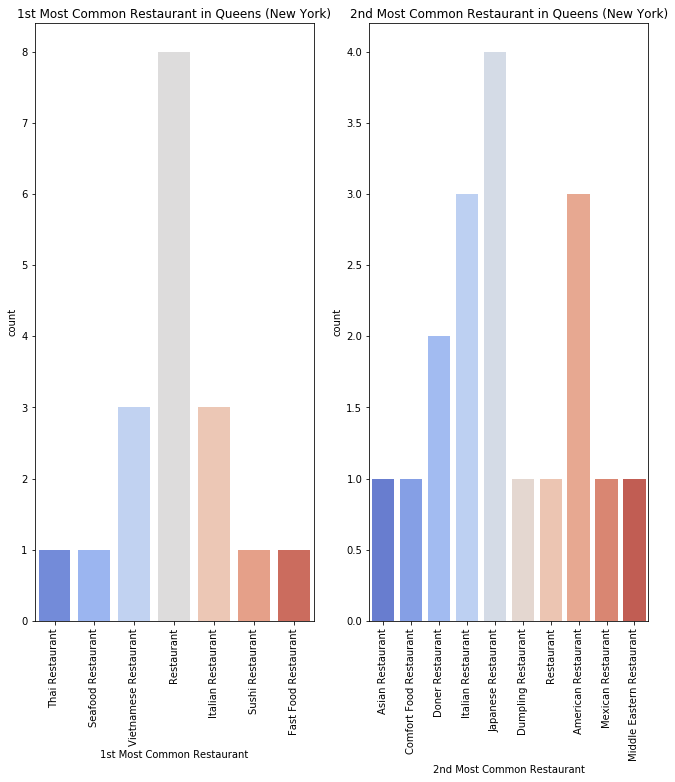

In [67]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize = (11, 11))
ax1 = sns.countplot(x = '1st Most Common Restaurant', data = down_restaurants_sorted, 
                    palette = 'coolwarm', ax = ax1)
ax1.set_title('1st Most Common Restaurant in Queens (New York)')
ax1.set_xticklabels(ax1.get_xticklabels(), rotation = 90)
ax2 = sns.countplot(x = '2nd Most Common Restaurant', data = down_restaurants_sorted, 
                    palette = 'coolwarm', ax = ax2)
ax2.set_title('2nd Most Common Restaurant in Queens (New York)')
ax2.set_xticklabels(ax2.get_xticklabels(), rotation = 90)
plt.show()


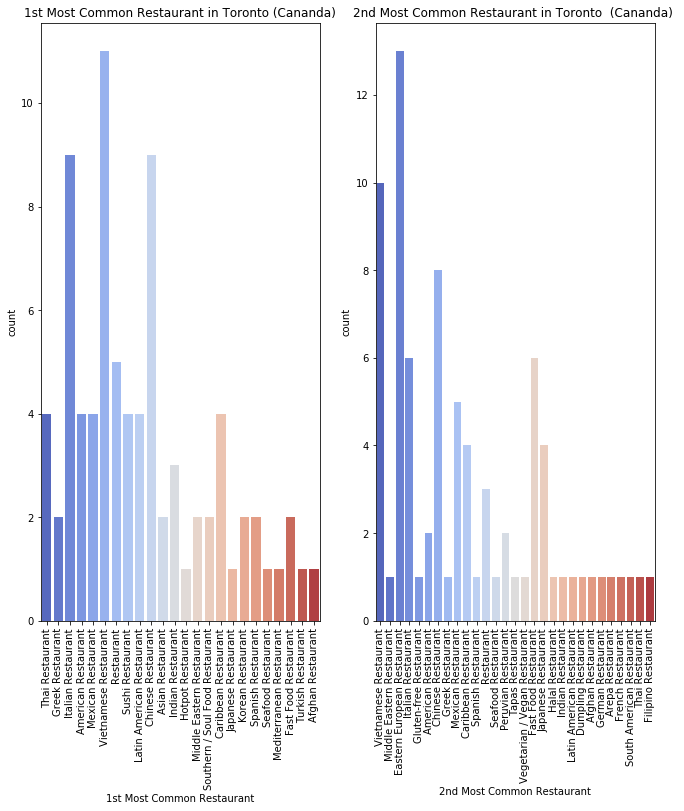

In [68]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize = (11, 11))
ax1 = sns.countplot(x = '1st Most Common Restaurant', data = Queens_restaurants_sorted, 
                    palette = 'coolwarm', ax = ax1)
ax1.set_title('1st Most Common Restaurant in Toronto (Cananda)')
ax1.set_xticklabels(ax1.get_xticklabels(), rotation = 90)
ax2 = sns.countplot(x = '2nd Most Common Restaurant', data = Queens_restaurants_sorted, 
                    palette = 'coolwarm', ax = ax2)
ax2.set_title('2nd Most Common Restaurant in Toronto  (Cananda) ')
ax2.set_xticklabels(ax2.get_xticklabels(), rotation = 90)
plt.show()
